### Análisis EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sys
import io

sys.path.append('../scripts')
from dataset_loader import get_dataframe

warnings.filterwarnings('ignore')
plt.rcParams["font.family"] = "monospace"

In [2]:
# Se carga el DataFrame principal, el cual contiene todos los datasets unificados
main_df = get_dataframe('../data/raw')


In [3]:
# Funciones utilities para el análsis exploratorio de los datos.

def analisis_descriptivo(df):
	return pd.DataFrame([
			df.count(),
			df.nunique(),
			df.sum(numeric_only=True),
			df.mean(numeric_only=True),
			df.median(numeric_only=True),
			df.mode(numeric_only=True).iloc[0],
			df.min(numeric_only=True),
			df.max(numeric_only=True),
			df.std(numeric_only=True),
			df.sem(numeric_only=True),
			df.var(numeric_only=True),
			df.skew(numeric_only=True),
			df.kurt(numeric_only=True),
			df.select_dtypes(include=np.number).quantile(0.25),
			df.select_dtypes(include=np.number).quantile(0.75),
		],
		index=["count", "num unique", "sum", "mean", "median", "mode", "min", "max", "std dev.", "std error", "variance", "skewness", "kurtosis", "quantile 25%", "quantile 75%"]
	)

def matriz_correlacion(df):
	df = df.select_dtypes(include=np.number).copy()
	matrix = df.corr()
	
	plt.figure(figsize=(8,6))
	sns.heatmap(matrix, linewidth=0.5,cmap="RdYlGn", vmax=1, vmin=-1, annot=matrix.to_numpy(), annot_kws={"size":6})
	plt.title("Matriz de Correlación", fontsize=12)
	
	buf = io.StringIO()
	plt.savefig(buf, format="svg")
	
	return {
		"matrix": matrix,
		"svg": buf.getvalue(),
	}

def crear_boxplot(df):
	df = df.select_dtypes(include=np.number).copy()
	
	for column in df.columns:
		df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
	
	plt.figure(figsize=(8, 6))
	ax = sns.boxplot(x="variable", y="value", data=pd.melt(df))
	ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
	
	plt.title("Detectar outliers")
	plt.xlabel("Variables")
	plt.ylabel("Valores")
	plt.show()

def descriptivo_coleccion(df_source, categoria):
    stats_merged = pd.DataFrame()
    
    for i,n in enumerate(df_source[categoria].cat.categories, 1):
        df = df_source[df_source[categoria + '_id'] == i][['costo']]

        if df.size:
            df = analisis_descriptivo(df)
            df.columns = [n]
            stats_merged = pd.concat([stats_merged, df], axis=1)
    
    return stats_merged

producto  medida_cantidad medida_unidad  \
0  BABILLA (CARNE DE RES DE PRIMERA)              1.0    Kilogramos   
1  BABILLA (CARNE DE RES DE PRIMERA)              1.0    Kilogramos   
2  BABILLA (CARNE DE RES DE PRIMERA)              1.0    Kilogramos   
3  BABILLA (CARNE DE RES DE PRIMERA)              1.0    Kilogramos   
4  BABILLA (CARNE DE RES DE PRIMERA)              1.0    Kilogramos   
5  BABILLA (CARNE DE RES DE PRIMERA)              1.0    Kilogramos   
6  BABILLA (CARNE DE RES DE PRIMERA)              1.0    Kilogramos   
7  BABILLA (CARNE DE RES DE PRIMERA)              1.0    Kilogramos   
8  BABILLA (CARNE DE RES DE PRIMERA)              1.0    Kilogramos   
9  BABILLA (CARNE DE RES DE PRIMERA)              1.0    Kilogramos   

                  supermercado  costo  anio  mes            cadena  \
0      RIBA SMITH TRANSISTMICA   6.55  2020    2        RIBA SMITH   
1         SUPER 99 CAMINO REAL   6.55  2020    2          SUPER 99   
2           SUPER 99 EL DORADO   6.55  2020    2          SUPER 99   
3      EL MACHETAZO METRO MALL   5.97  2020    2      EL MACHETAZO   
4         SUPER 99 LOS PUEBLOS   6.55  2020    2          SUPER 99   
5            SUPER 99 PEDREGAL   6.52  2020    2          SUPER 99   
6  CASA DE LA CARNE VIA PORRAS   6.36  2020    2  CASA DE LA CARNE   
7          SUPER 99 VIA PORRAS   6.36  2020    2          SUPER 99   
8      EL FUERTE SAN MIGUELITO   6.55  2020    2         EL FUERTE   
9   EL MACHETAZO SAN MIGUELITO   6.55  2020    2      EL MACHETAZO   

   supermercado_id  producto_id  cadena_id  
0               75            5          5  
1               78            5          6  
2               80            5          6  
3               20            5          2  
4               84            5          6  
5               87            5          6  
6               13            5          0  
7               93            5          6  
8               15            5          1  
9               24            5          2

ABA EL CANGREJO BELLA VISTA  ABARROTERIA BERAKA  \
count                          617.000000          440.000000   
num unique                      75.000000           60.000000   
sum                           1362.690000          816.910000   
mean                             2.208574            1.856614   
median                           1.540000            1.350000   
mode                             1.000000            0.750000   
min                              0.350000            0.350000   
max                              8.710000            8.380000   
std dev.                         1.738243            1.524296   
std error                        0.069979            0.072668   
variance                         3.021490            2.323478   
skewness                         1.437761            2.017738   
kurtosis                         1.960398            4.103801   
quantile 25%                     0.880000            0.770000   
quantile 75%                     3.310000            2.200000   

              ABARROTERIA DENIA SAN MIGUELITO  ABARROTERIA EDITH SANTA ANA  \
count                              314.000000                   652.000000   
num unique                          87.000000                    66.000000   
sum                                528.440000                  1504.650000   
mean                                 1.682930                     2.307745   
median                               1.250000                     1.650000   
mode                                 0.750000                     0.750000   
min                                  0.300000                     0.350000   
max                                  8.690000                     8.710000   
std dev.                             1.370400                     1.911044   
std error                            0.077336                     0.074842   
variance                             1.877996                     3.652091   
skewness                             2.179833                     1.613883   
kurtosis                             5.731728                     2.074218   
quantile 25%                         0.770000                     0.880000   
quantile 75%                         1.920000                     2.760000   

              ABARROTERIA ELENA BETHANIA  ABARROTERIA JUAN CARLOS BETHANIA  \
count                         562.000000                        612.000000   
num unique                     88.000000                         86.000000   
sum                          1182.250000                       1255.910000   
mean                            2.103648                          2.052141   
median                          1.540000                          1.430000   
mode                            0.750000                          0.750000   
min                             0.300000                          0.250000   
max                             9.360000                          8.710000   
std dev.                        1.698822                          1.699241   
std error                       0.071660                          0.068688   
variance                        2.885995                          2.887421   
skewness                        1.807587                          1.793429   
kurtosis                        3.664158                          3.104660   
quantile 25%                    0.880000                          0.880000   
quantile 75%                    2.760000                          2.650000   

              ABARROTERIA LA PAGODA  ABARROTERIA LA PAGODA NO 2  \
count                    581.000000                  443.000000   
num unique                69.000000                   57.000000   
sum                     1125.650000                  700.190000   
mean                       1.937435                    1.580564   
median                     1.350000                    1.250000   
mode                       1.250000                    1.000000   
min   

ACEITE VEGETAL NACIONAL  AJI DULCE Y / O PICOLORO          AJO  \
count                     1369.000000                956.000000  1467.000000   
num unique                 133.000000                128.000000     9.000000   
sum                       3329.250000               2999.520000  1284.450000   
mean                         2.431885                  3.137573     0.875562   
median                       2.350000                  2.950000     0.880000   
mode                         2.200000                  2.950000     0.880000   
min                          1.130000                  1.180000     0.760000   
max                          5.450000                  4.840000     0.880000   
std dev.                     0.586786                  0.797830     0.010939   
std error                    0.015859                  0.025804     0.000286   
variance                     0.344318                  0.636533     0.000120   
skewness                     0.865671                  0.477128    -3.989060   
kurtosis                     1.284801                 -0.482500    24.918376   
quantile 25%                 2.020000                  2.680000     0.880000   
quantile 75%                 2.760000                  3.640000     0.880000   

              ARROZ DE PRIMERA  AZUCAR MORENA  \
count              1258.000000     667.000000   
num unique           59.000000      54.000000   
sum                1793.990000    4353.860000   
mean                  1.426065       6.527526   
median                1.410000       6.550000   
mode                  1.630000       6.550000   
min                   0.900000       5.430000   
max                   2.130000       8.890000   
std dev.              0.260267       0.319173   
std error             0.007338       0.012358   
variance              0.067739       0.101871   
skewness              0.262422       2.460824   
kurtosis             -0.741975      13.138371   
quantile 25%          1.230000       6.505000   
quantile 75%          1.630000       6.550000   

              BABILLA (CARNE DE RES DE PRIMERA)  BISTEC DE CINTA  \
count                               1000.000000      1462.000000   
num unique                            63.000000        99.000000   
sum                                 5482.160000      6328.010000   
mean                                   5.482160         4.328324   
median                                 5.620000         4.750000   
mode                                   5.620000         4.750000   
min                                    4.150000         2.150000   
max                                    6.070000         6.950000   
std dev.                               0.265299         1.114195   
std error                              0.008389         0.029140   
variance                               0.070383         1.241430   
skewness                              -2.375016        -0.063769   
kurtosis                               6.201671        -1.166619   
quantile 25%                           5.457500         3.410000   
quantile 75%                           5.620000         5.250000   

              CAFE MOLIDO TRADICIONAL  CARNE MOLIDA DE PRIMERA  \
count                      750.000000               597.000000   
num unique                  36.000000                87.000000   
sum                       3496.290000              2721.500000   
mean                         4.661720                 4.558626   
median                       4.740000                 4.450000   
mode                         4.740000                 4.450000   
min                          2.950000                 1.980000   
max                          5.840000                 7.420000   
std dev.                     0.241966                 0.596191   
std error                    0.008835                 0.024400   
variance                     0.058548                 0.355444   
skewness                    -2.778480                 0.784262   
k

'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="576pt" height="432pt" viewBox="0 0 576 432" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2025-08-29T17:12:10.180533</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.8.4, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <path d="M 0 43

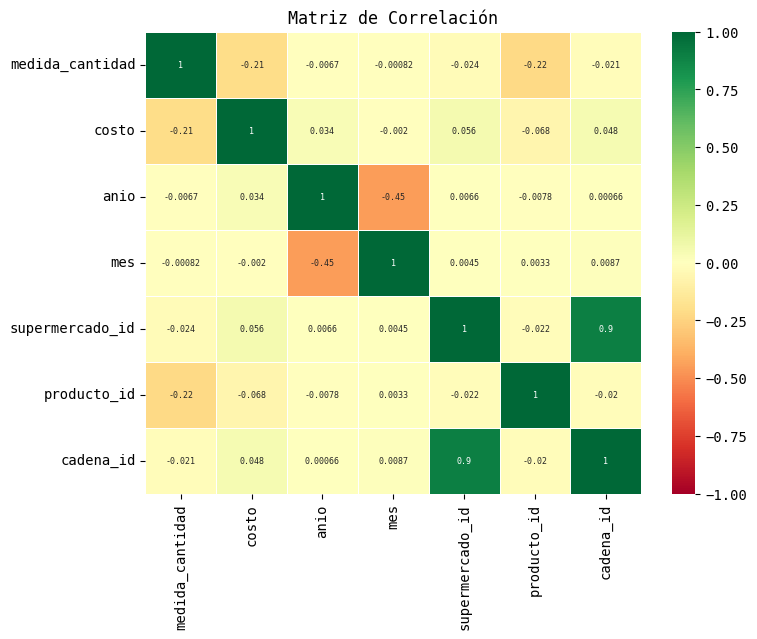

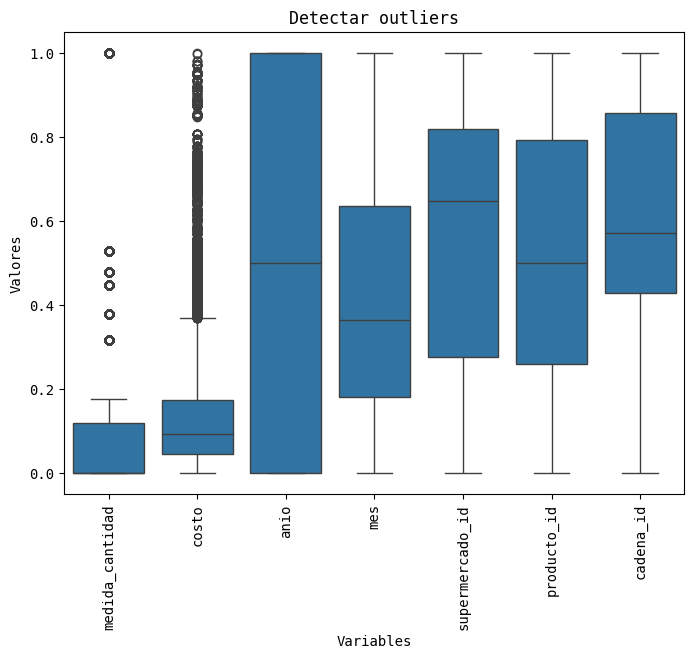

In [4]:
# Se muestran las primeras 10 filas del dataset.
display(main_df.head(10))

# Generación de descriptivos por cada supermercado.
display(descriptivo_coleccion(main_df, 'supermercado'))

# Generación de descriptivos por cada producto.
display(descriptivo_coleccion(main_df, 'producto'))

# Generación de una matriz de correlación de las variables numéricas.
# Aparte de la obvia relación entre cadena y supermercado, no se evidencia
# correlación significativa entre las variables.
result = matriz_correlacion(main_df)
display(result['svg'])

# Generación de un boxplot para visualizar outliers de las variables numéricas.
crear_boxplot(main_df)


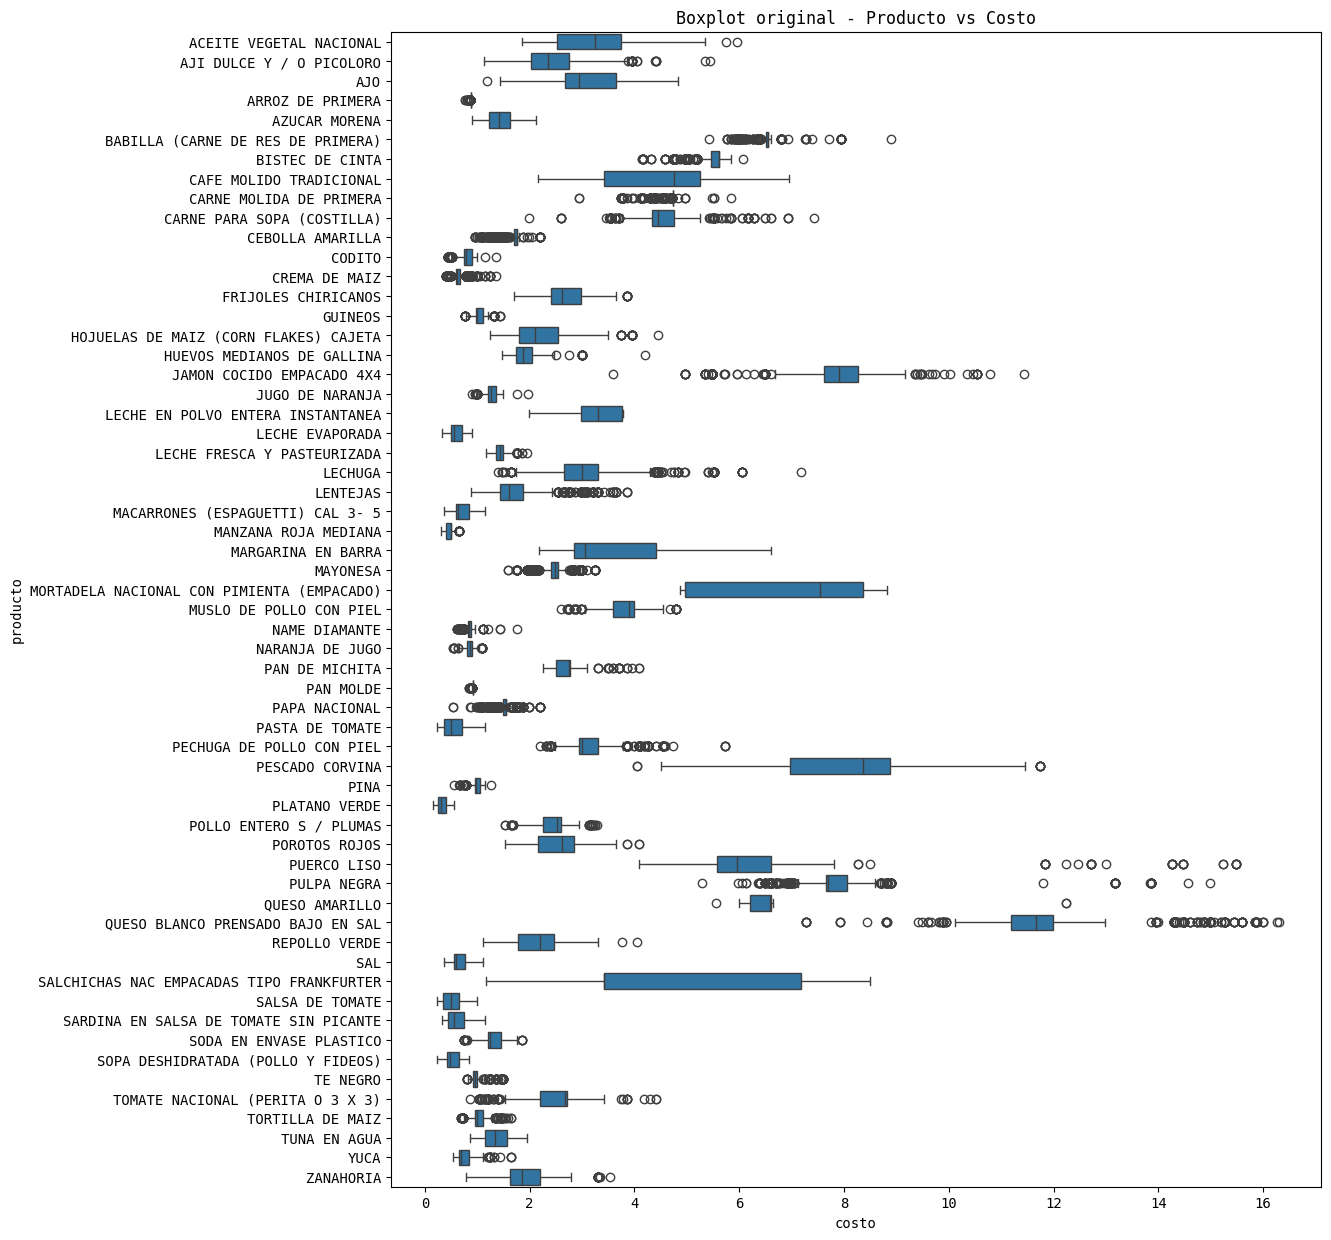

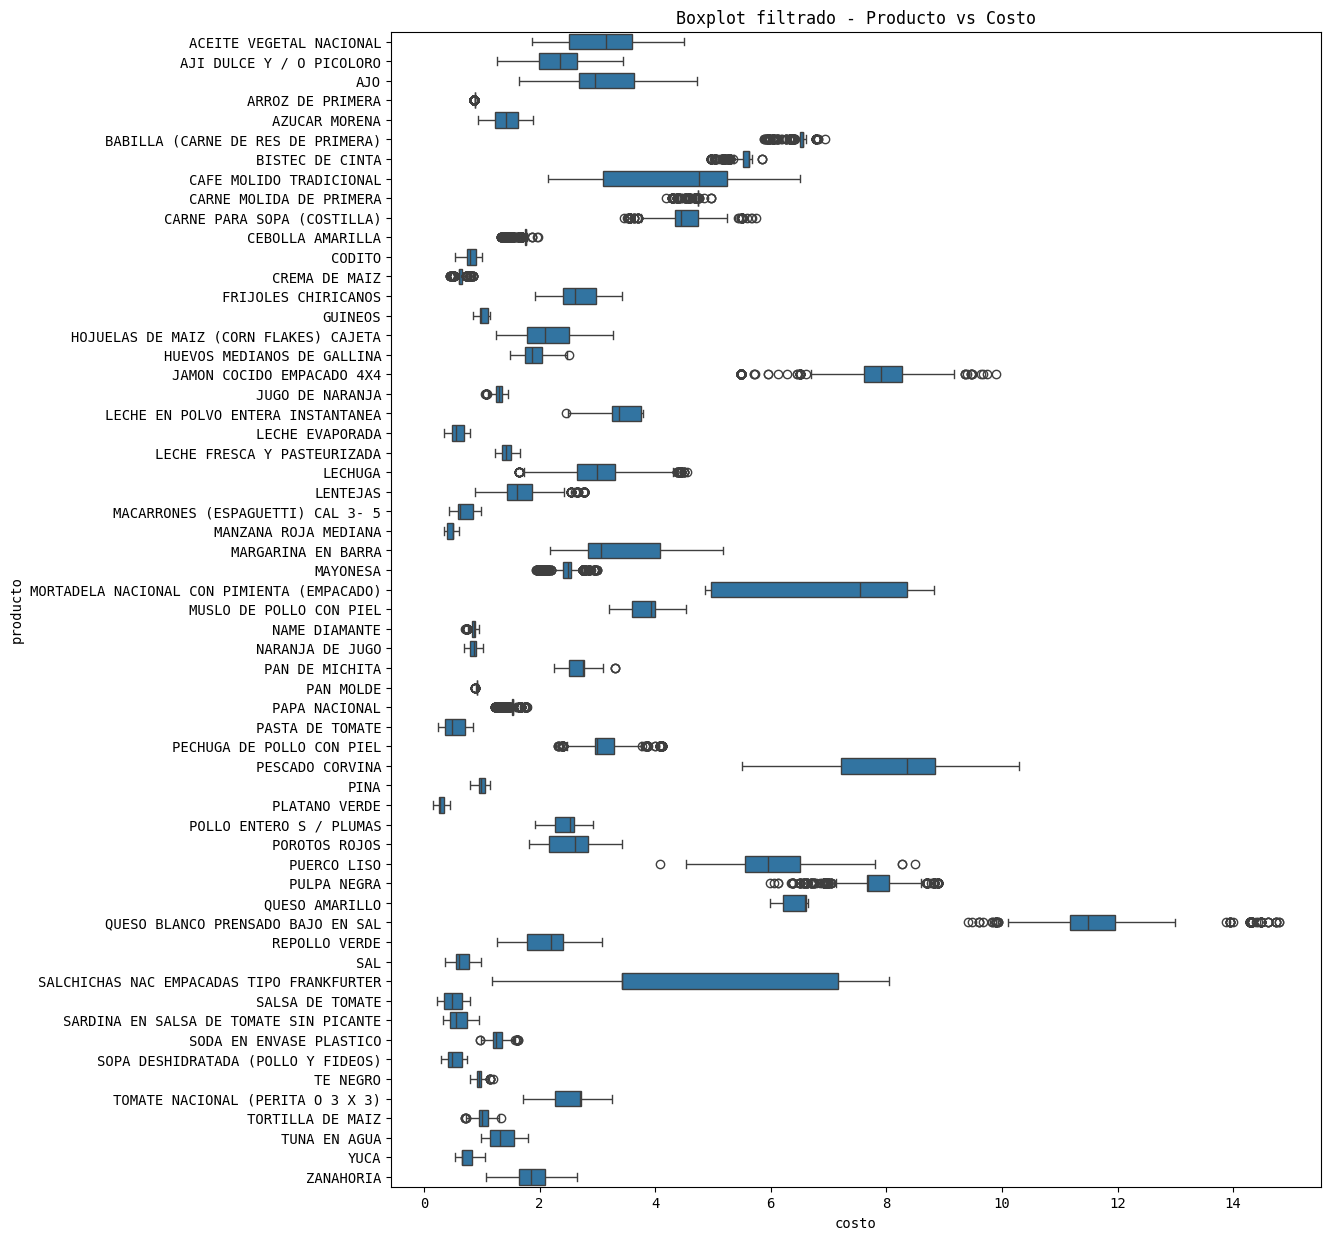

In [5]:
# Función utility para remover outliers. Recibe el dataframe, la variable x la cual se va a truncar,
# la variable y de filtrado, y el threshold permitido para la desviación estandar.
def remove_outliers(df_source, x_variable, y_variable, scale_std=1.0):
	ret = pd.DataFrame()

	for id,m in enumerate(df_source[y_variable].cat.categories):
		sub_df = df_source[df_source[y_variable + '_id'] == id]
		
		data_m, data_std = np.mean(sub_df[x_variable]), np.std(sub_df[x_variable])
		cutoff = data_std * scale_std
		v0, v1 = data_m - cutoff, data_m + cutoff
		sub_df = sub_df[(sub_df[x_variable] > v0) & (sub_df[x_variable] < v1)]
		ret = pd.concat([ret, sub_df])
	
	return ret

# Variables a considerar. Se debe de escoger costo como variable en x, ya que esta es la que vamos a truncar,
# pero se escoge producto para este análisis. El enfoque del estudio se hará principalmente sobre costos por producto de la
# CBA. Los supermercados puede ser una segunda opción pero para otro estudio, ya que abarcarían todos los costos
# de todos los productos de la CBA que ofrecen.
xvar = 'costo'
yvar = 'producto'

# Recortar outliers a 2 veces la desviación estandar.
main_df_no_outlier = remove_outliers(main_df, xvar, yvar, scale_std=2)

plt.figure(figsize=(12,15))
sns.boxplot(data=main_df, y=yvar, x=xvar)
plt.title('Boxplot original - {} vs {}'.format(yvar.capitalize(), xvar.capitalize()))
plt.show()

plt.figure(figsize=(12,15))
sns.boxplot(data=main_df_no_outlier, y=yvar, x=xvar)
plt.title('Boxplot filtrado - {} vs {}'.format(yvar.capitalize(), xvar.capitalize()))
plt.show()

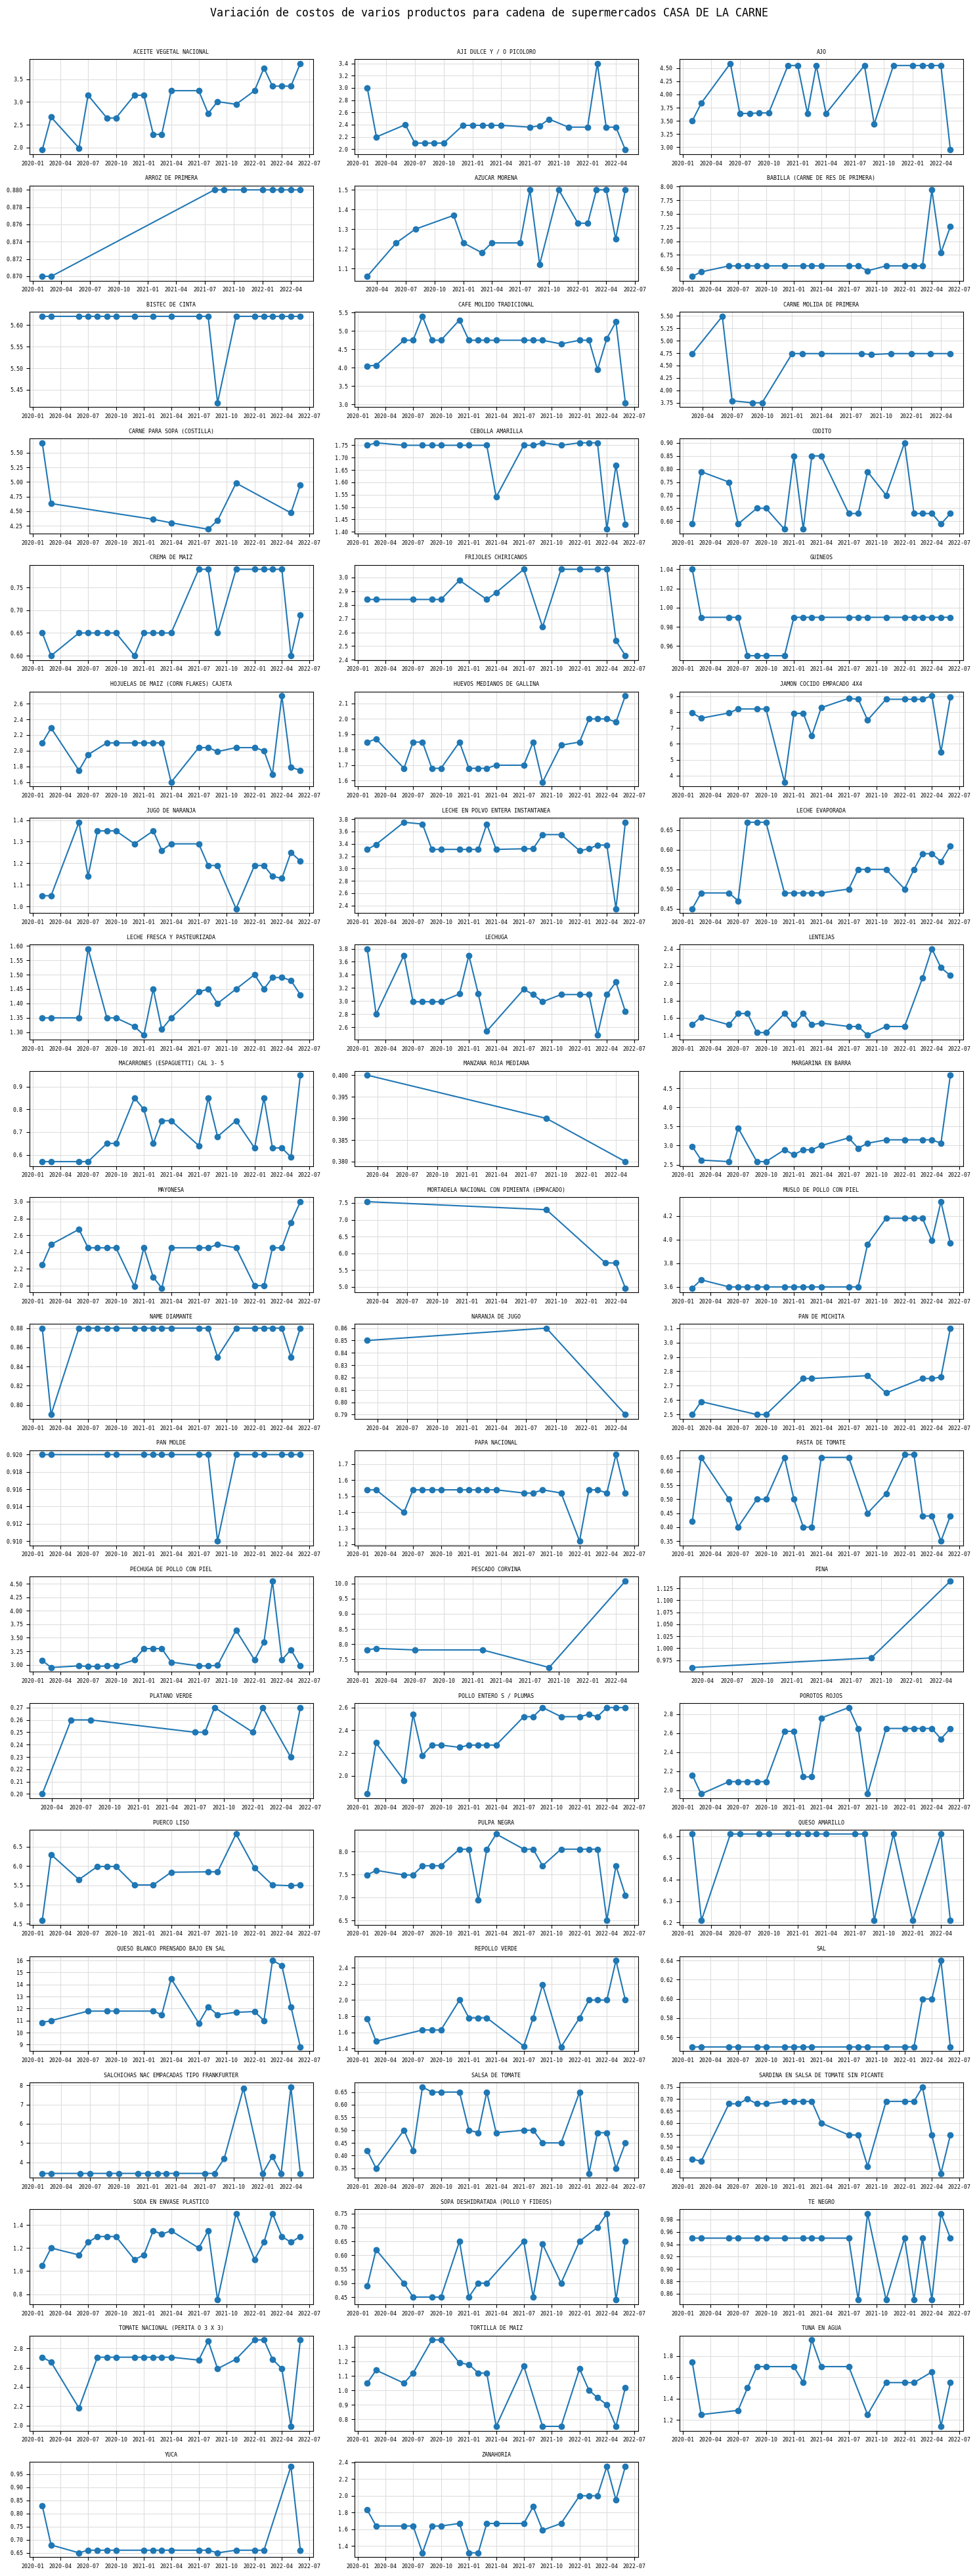

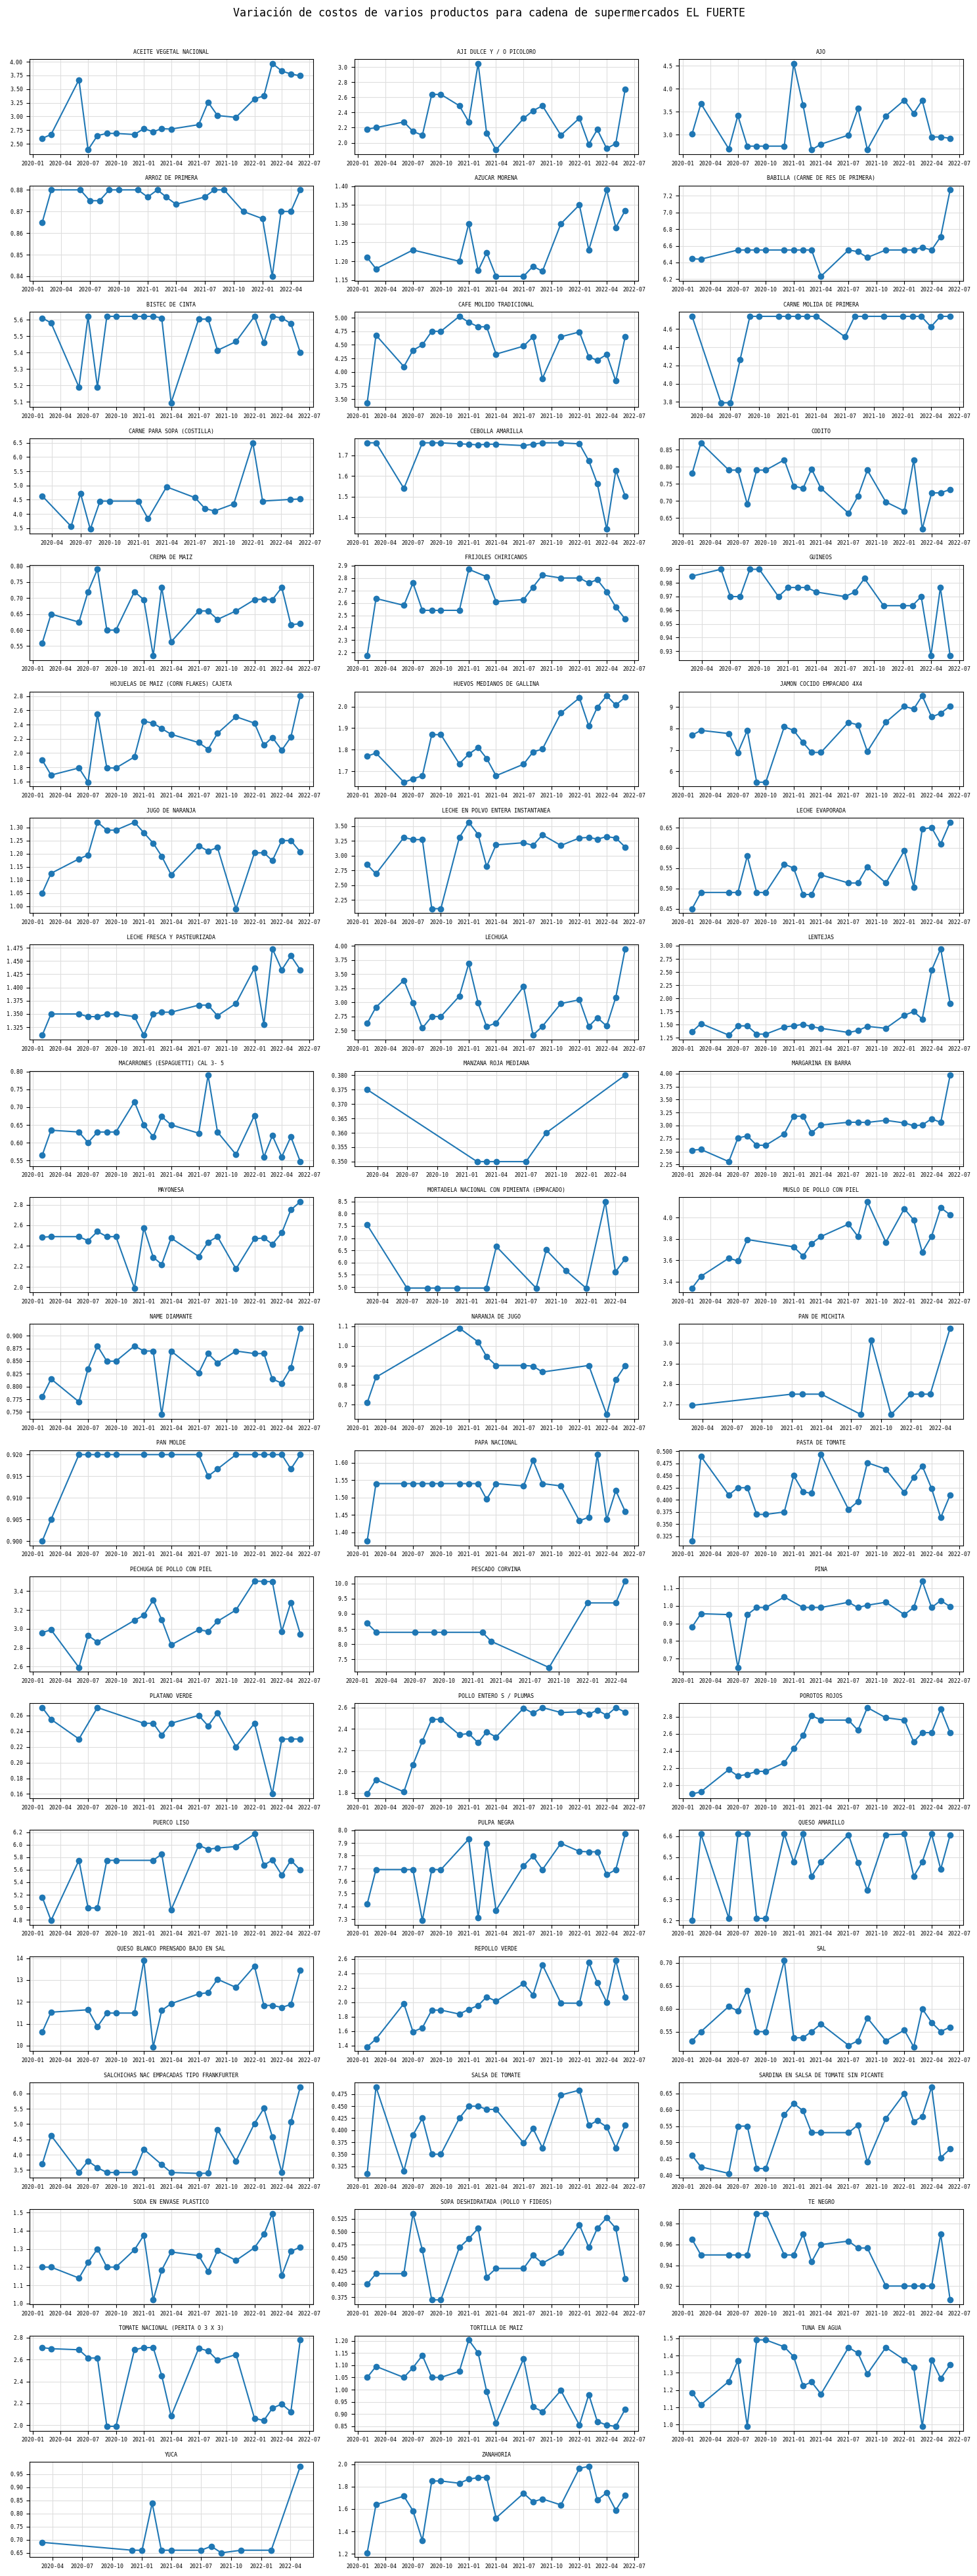

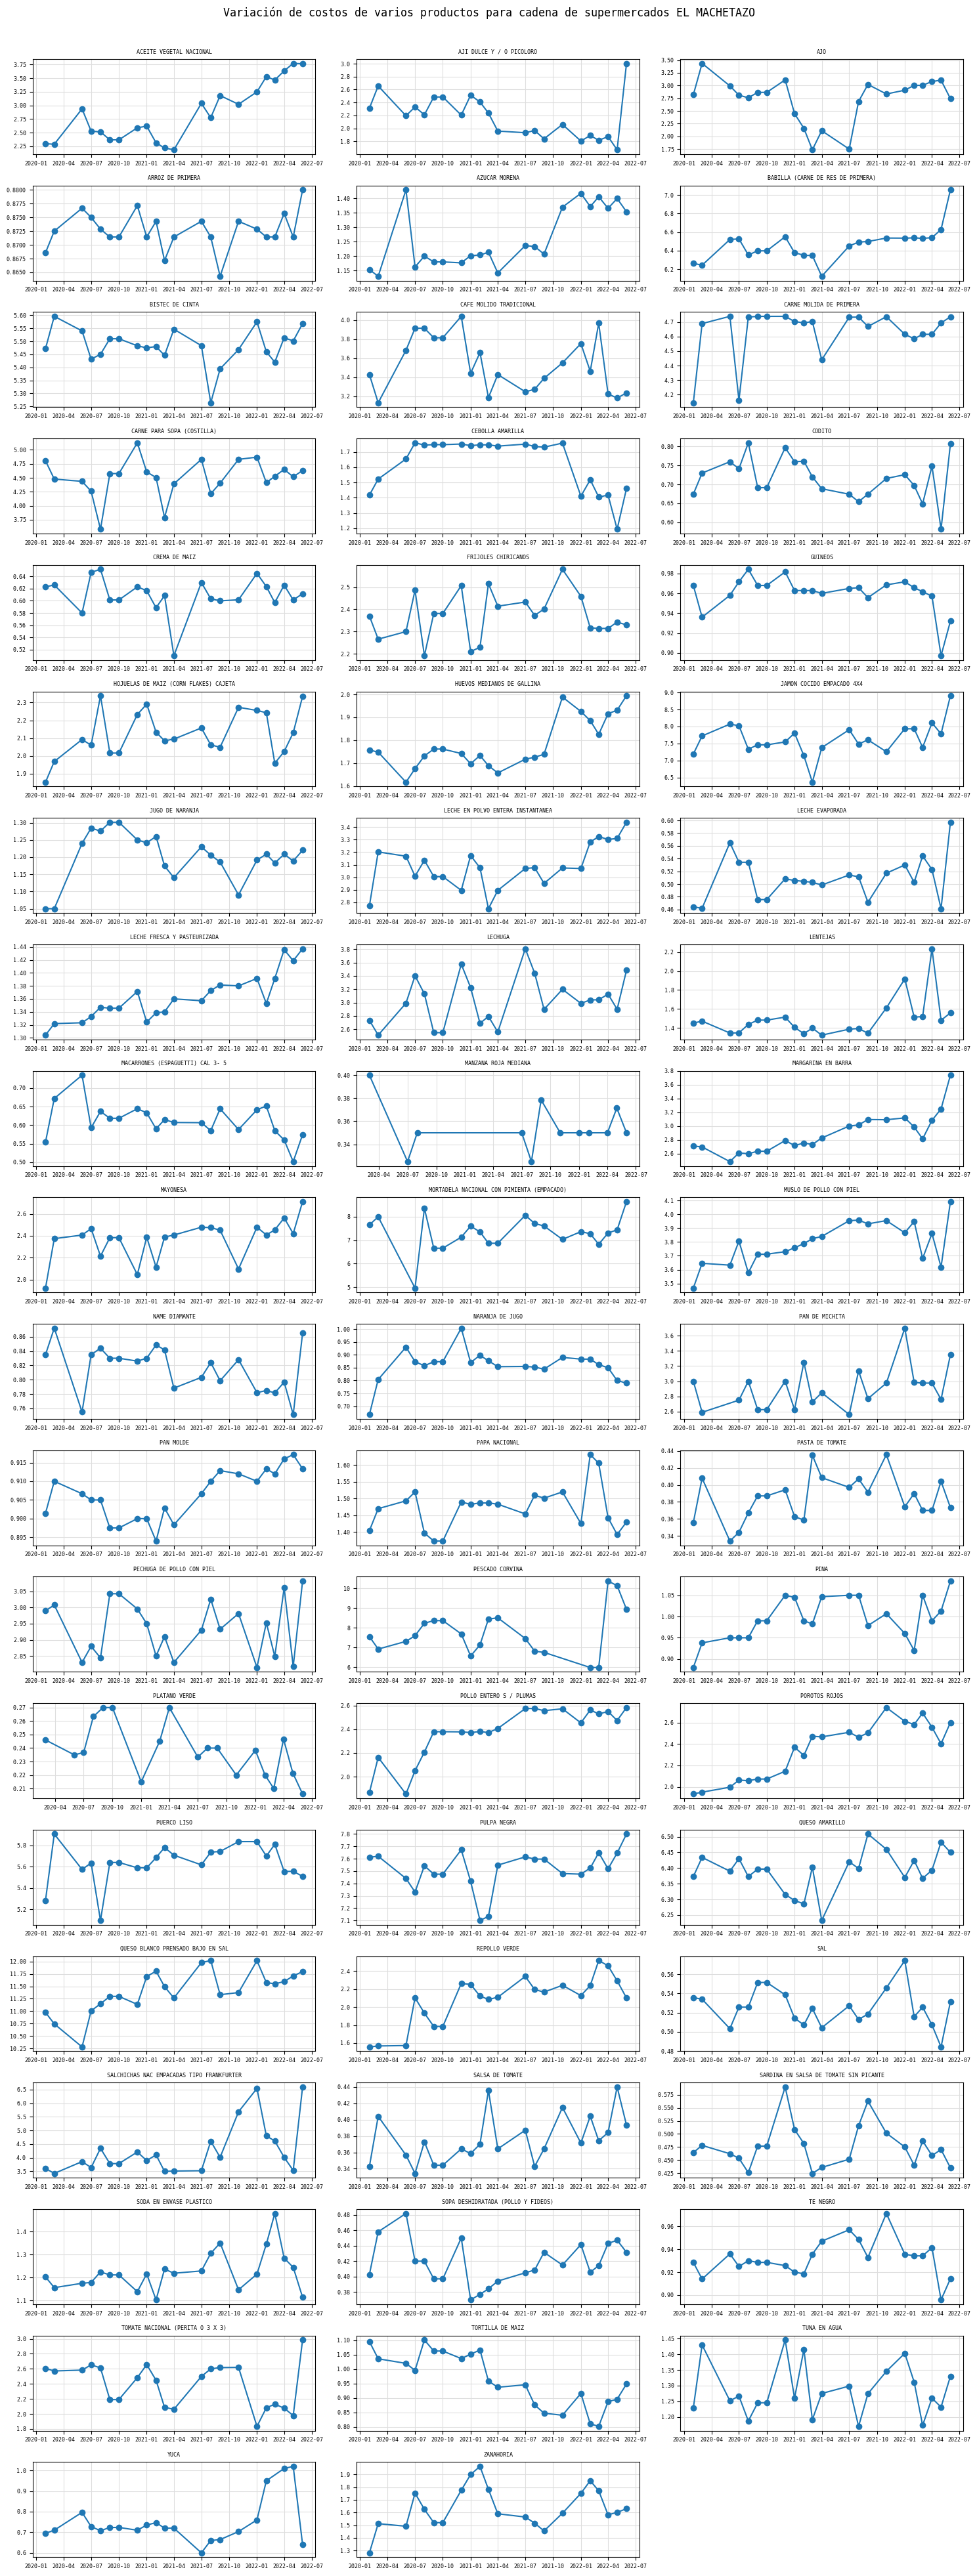

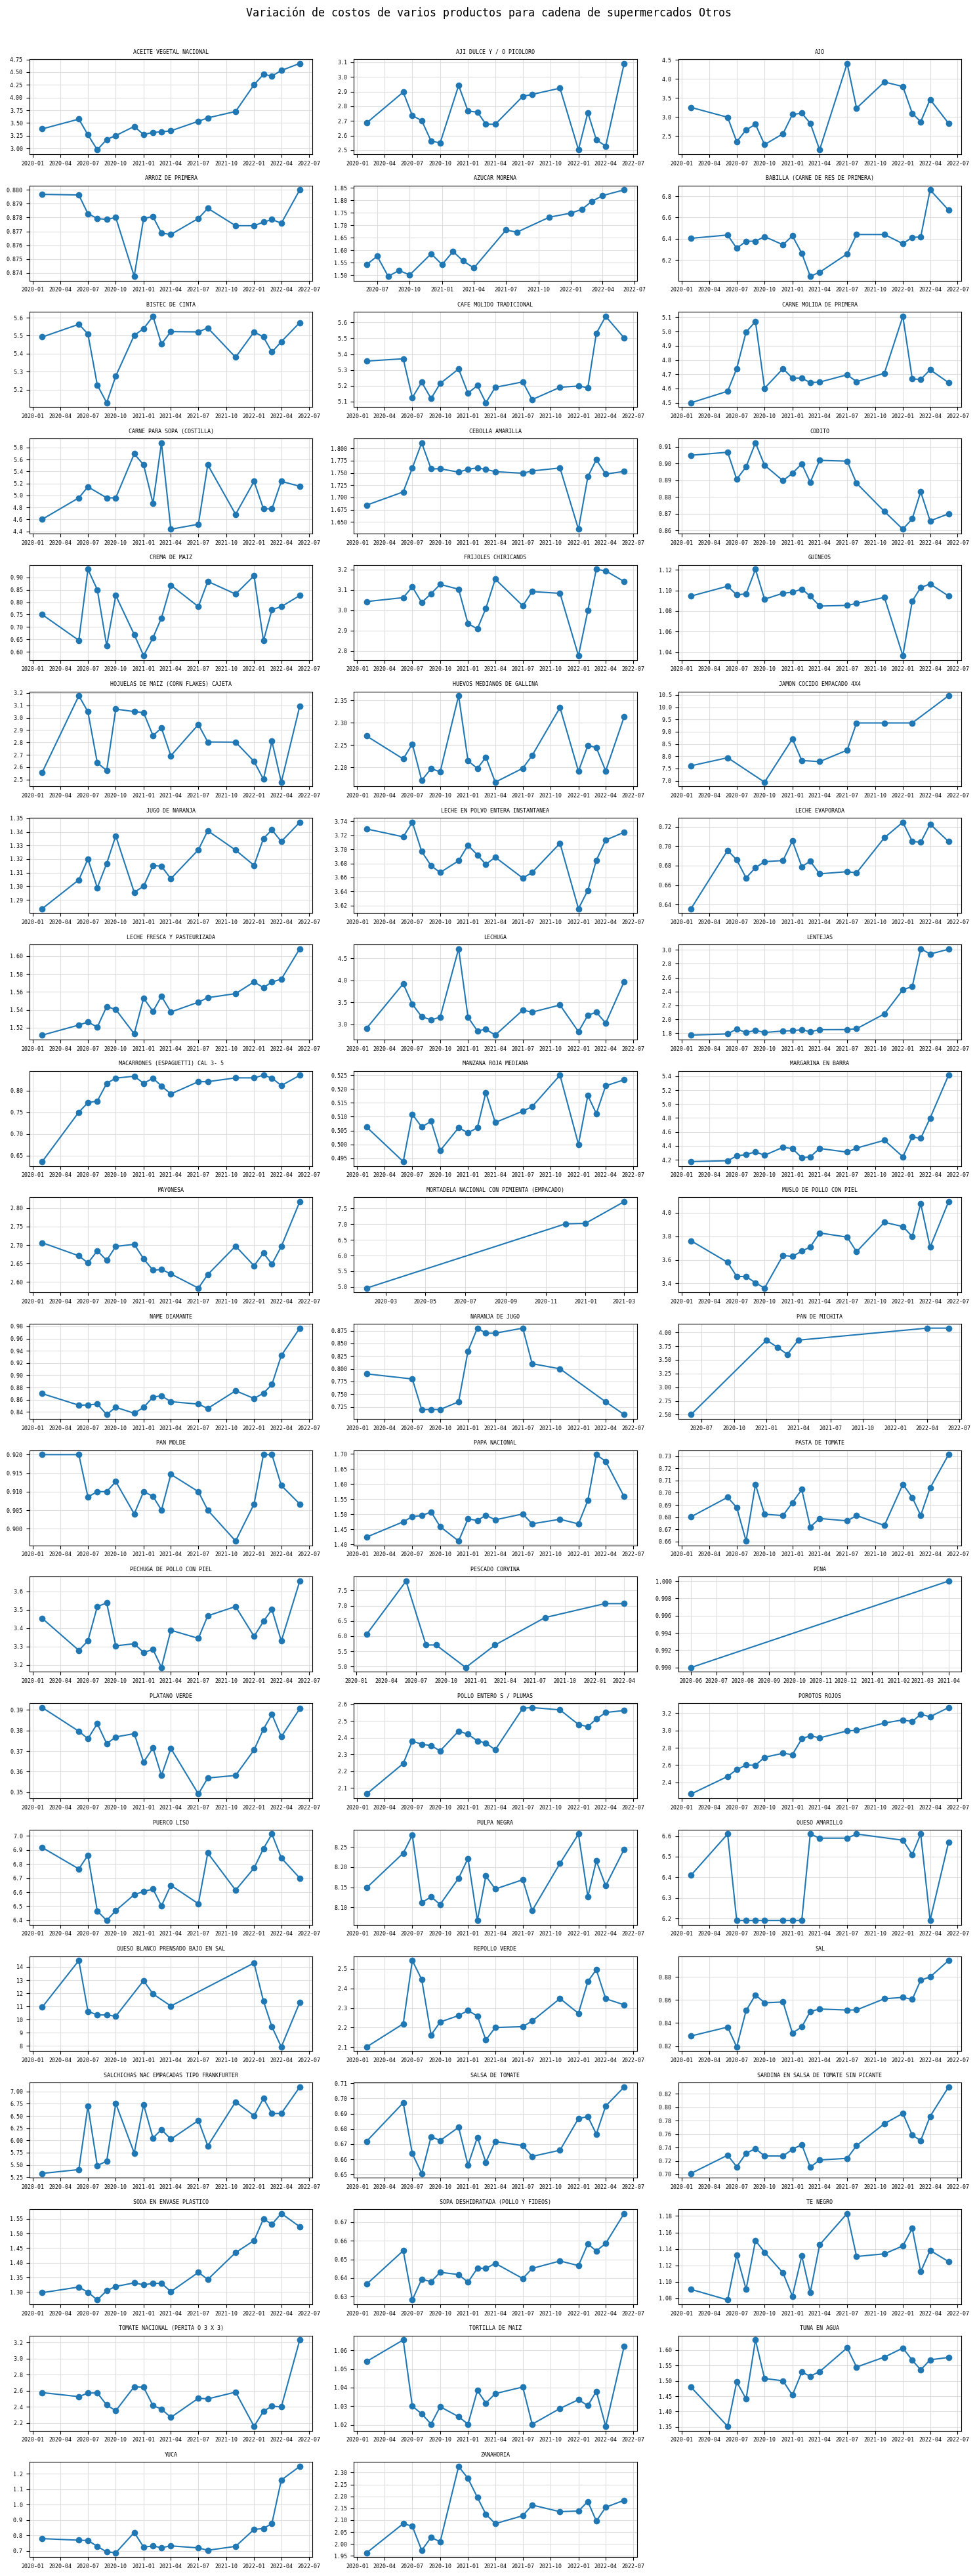

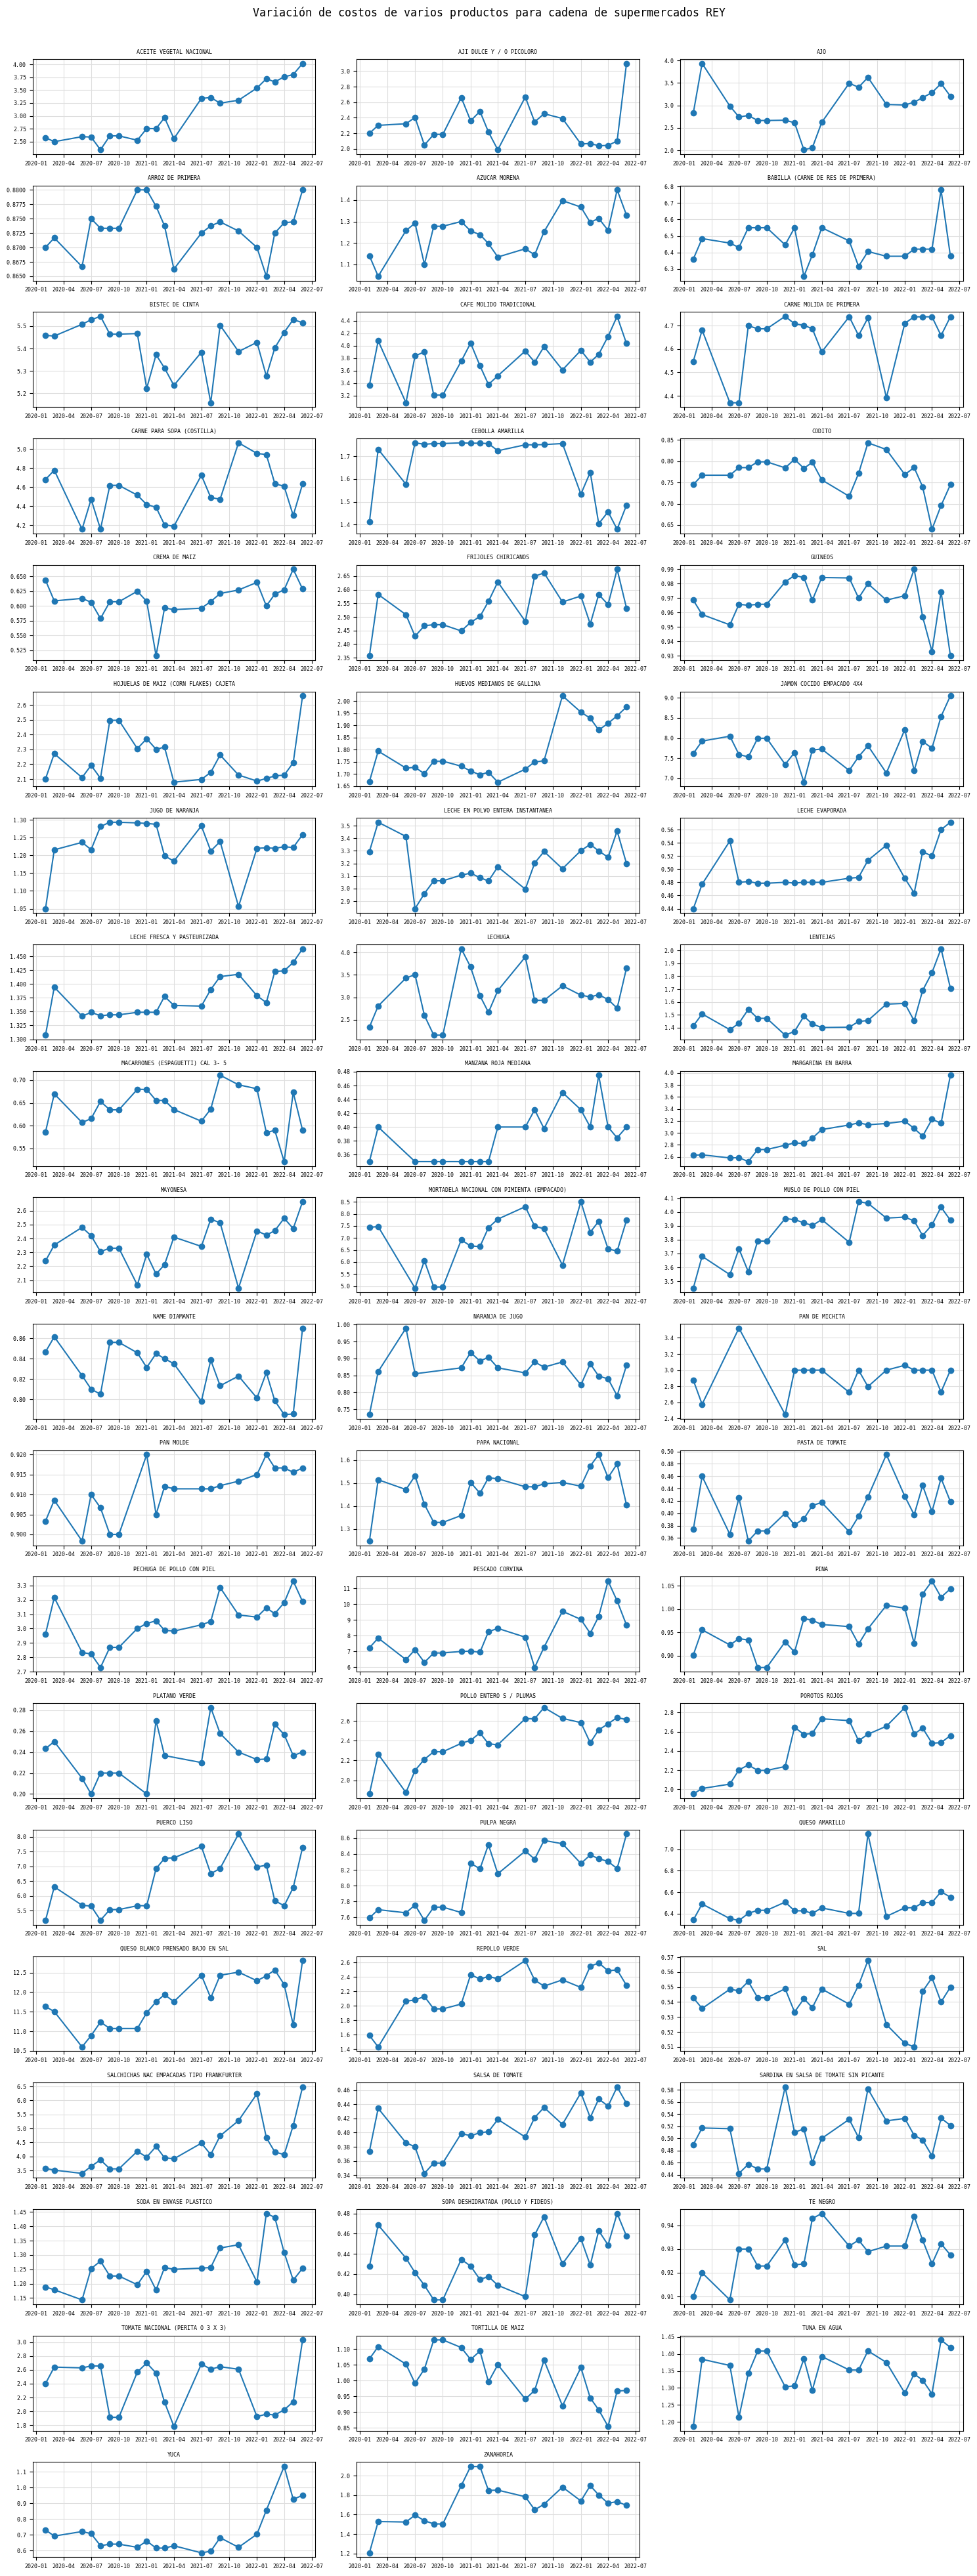

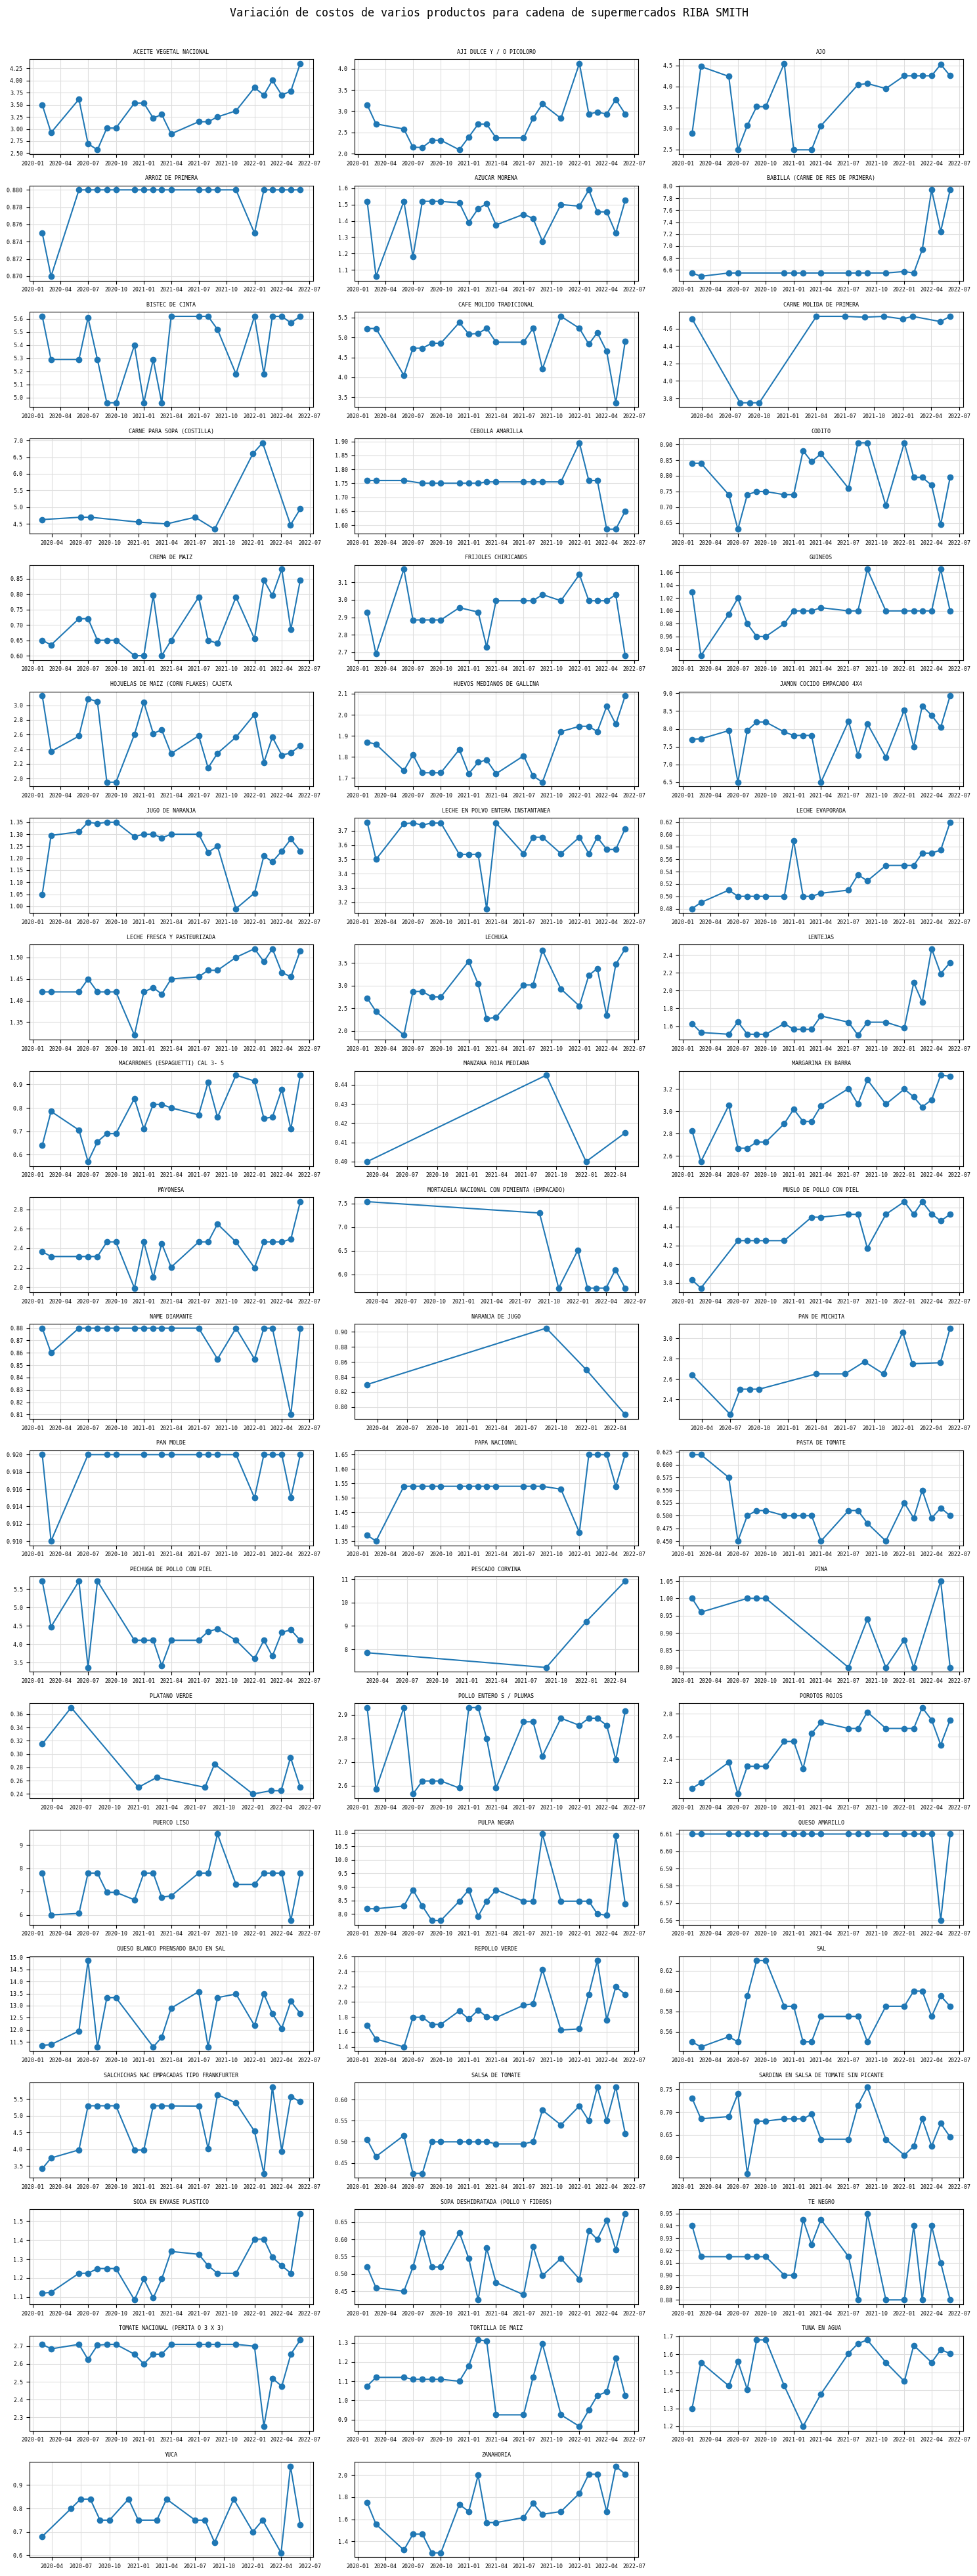

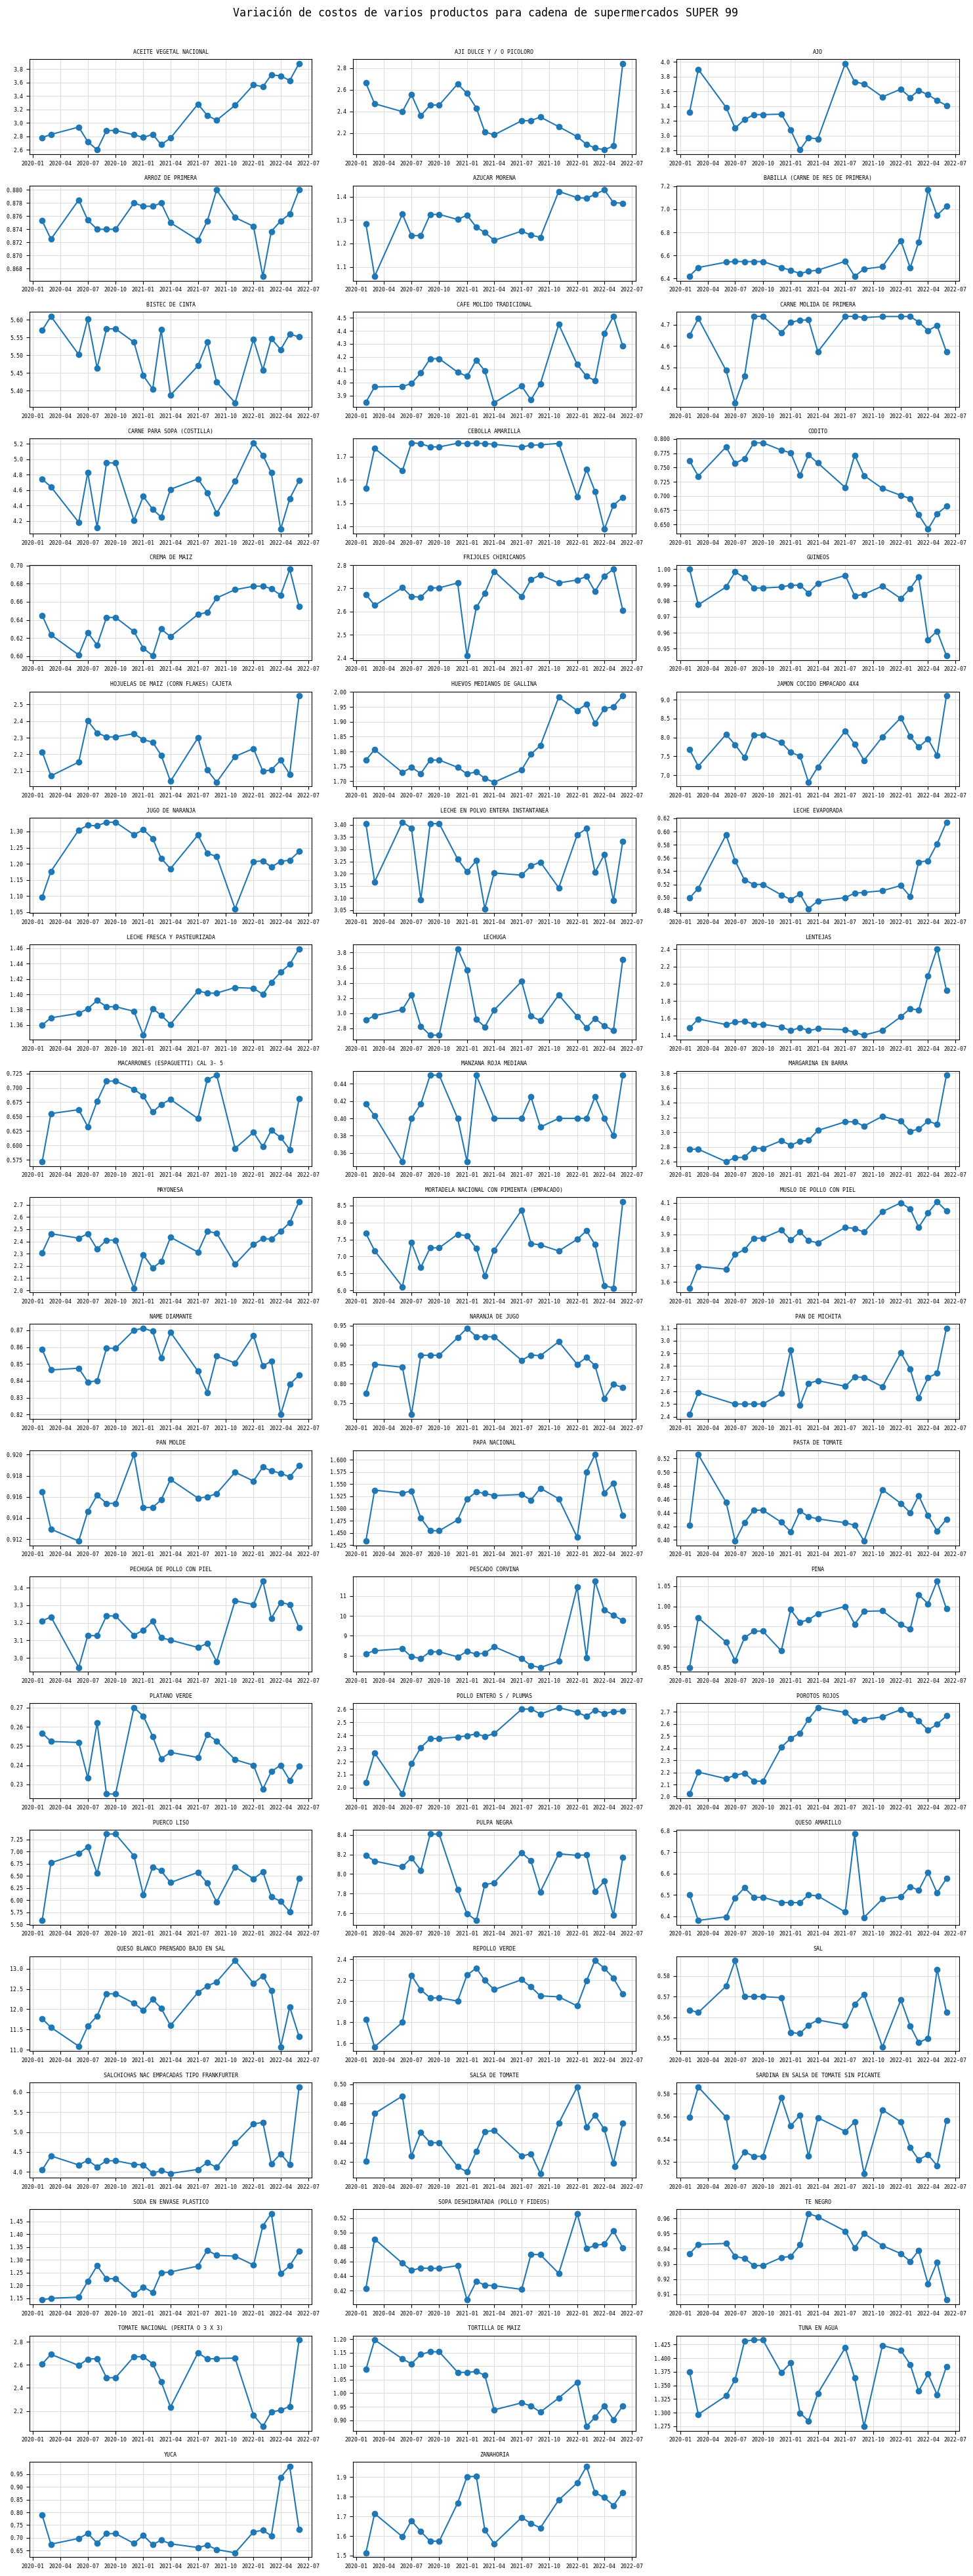

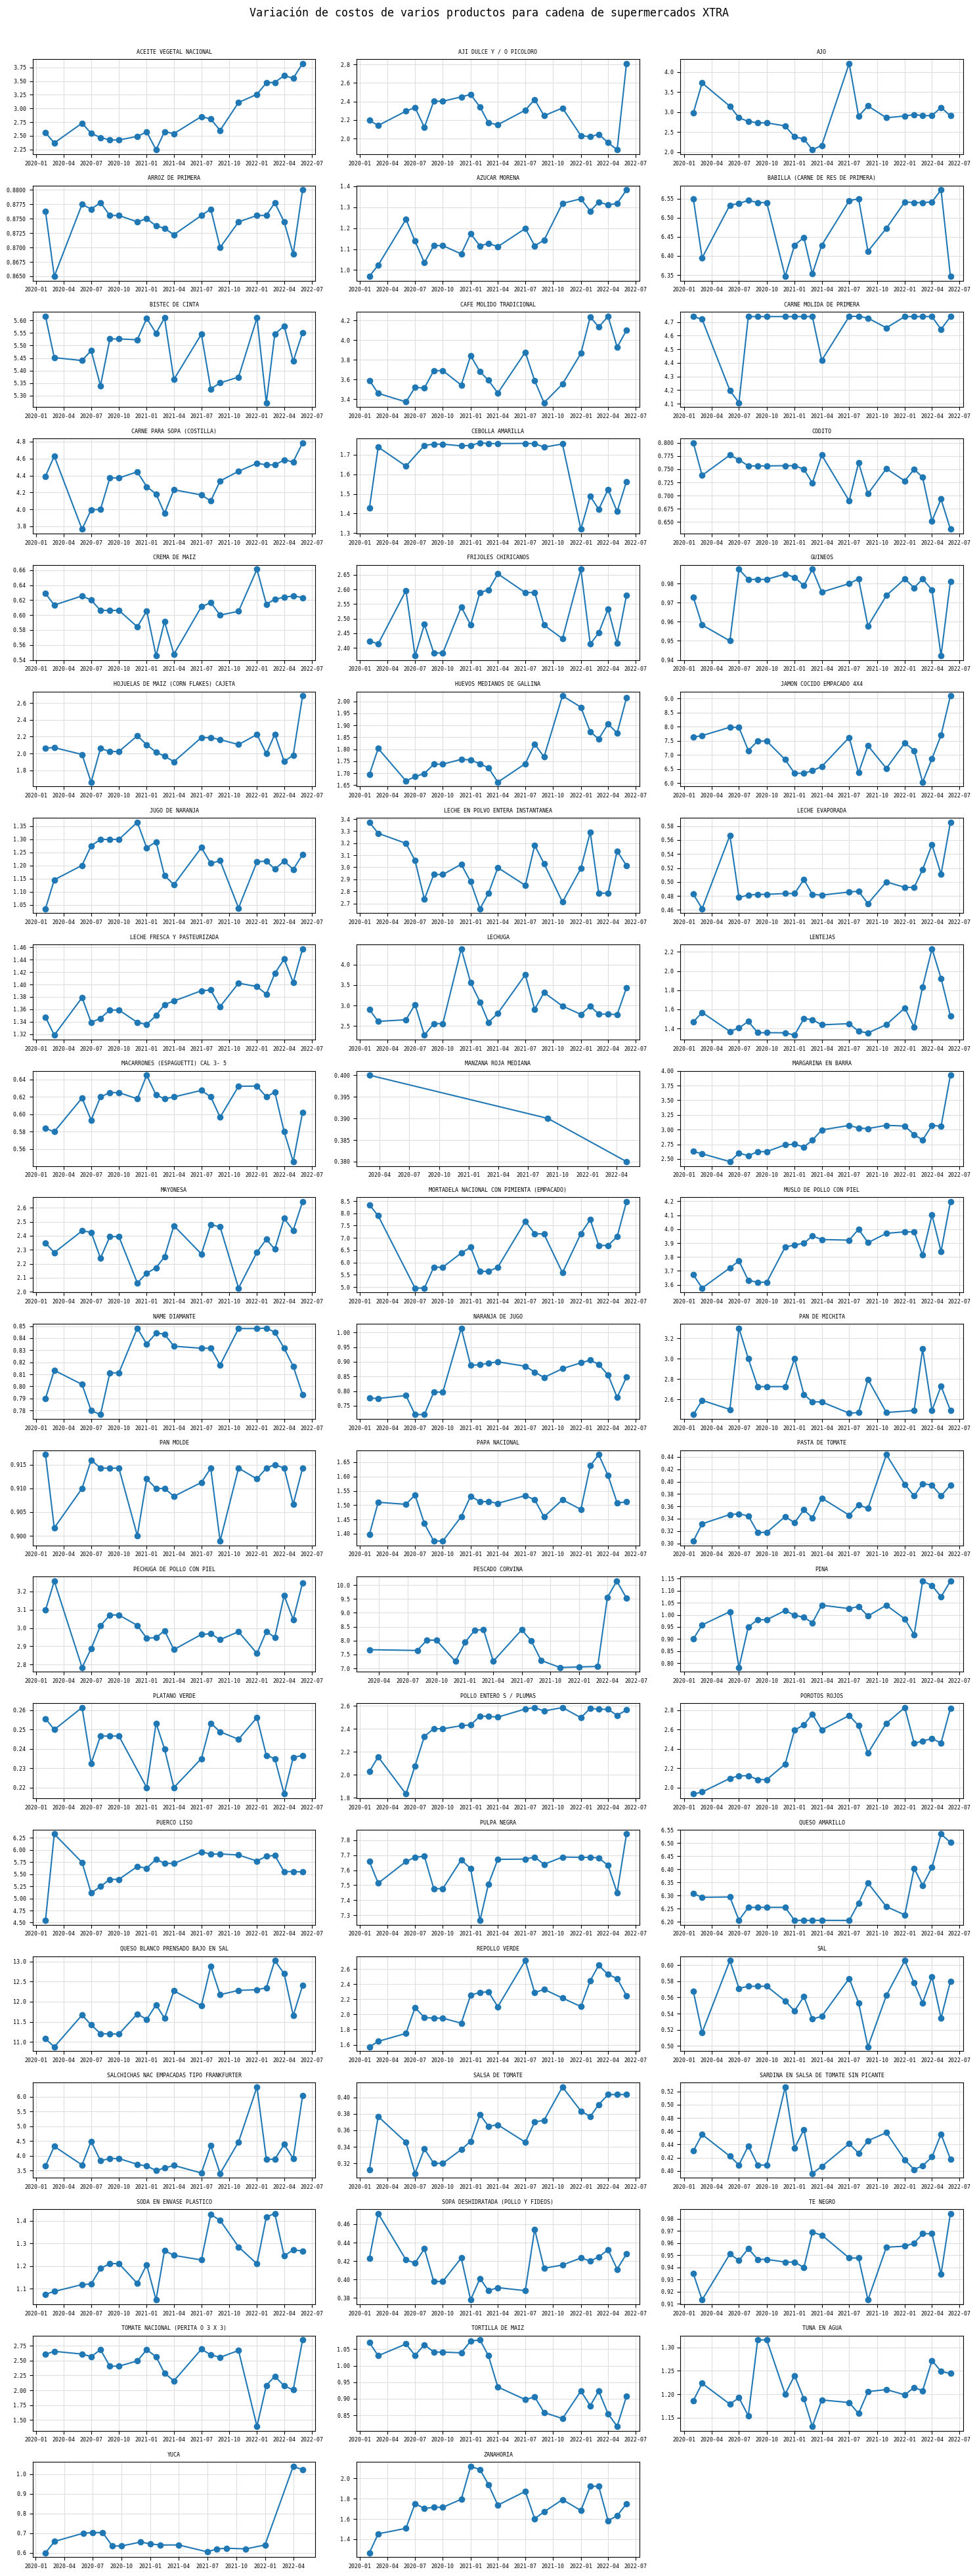

In [6]:
# Generación de gráficos para cada cadena de supermercados. Cada gráfico contiene sub-gráficos, uno
# por cada producto de la CBA ofertado por la cadena. Todas los supermercados tipo abarrotería, minisuper,
# kioskos, etc que no pertenezcan a alguna cadena reconocida, fueron agrupados bajo el nombre 'Otros'.
# Aviso. Este código toma cierto tiempo en culminar.

# Se recorren todas las cadenas de supermercado.
for cadena_id,cadena_name in enumerate(main_df.cadena.cat.categories):
    producto_dfs = []

    # Se recorren todos los productos de esta cadena.
    for producto_id,producto_name in enumerate(main_df.producto.cat.categories):
        df = main_df[(main_df.producto_id == producto_id) & (main_df.cadena_id == cadena_id)]

        # Se agrupan los productos por año y mes, para luego obtener la media de los costos.
        df = df.groupby(['anio', 'mes'])['costo'].mean().reset_index()
        df['fecha'] = pd.to_datetime(df['anio'].astype(str) + '-' + df['mes'].astype(str))
        producto_dfs.append((df, producto_name))
    
    # Se prepara un sublot de 3 columnas por n filas de productos.
    items_per_chunk = 3
    chunks = [producto_dfs[i:i+items_per_chunk] for i in range(0, len(producto_dfs), items_per_chunk)]
    
    fig, axs = plt.subplots(len(chunks), items_per_chunk, figsize=(15,40))
    fig.suptitle('Variación de costos de varios productos para cadena de supermercados %s' % cadena_name)

    for chu_idx, chu in enumerate(chunks):
        ax_chu = axs[chu_idx]

        for i,ax in enumerate(ax_chu):
            try: df, producto_name = chu[i]
            except:
                ax.set_axis_off()
                continue

            ax.plot(df['fecha'], df['costo'], marker='o')
            ax.set_title(producto_name, fontsize=6)
            ax.tick_params(axis='x', labelsize=6)
            ax.tick_params(axis='y', labelsize=6)
            ax.grid(True, color='#dedede')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.96)
    plt.show()


In [22]:
main_df_no_outlier.to_csv('../data/processed/datasers_merged_cleaned.csv', index=False)